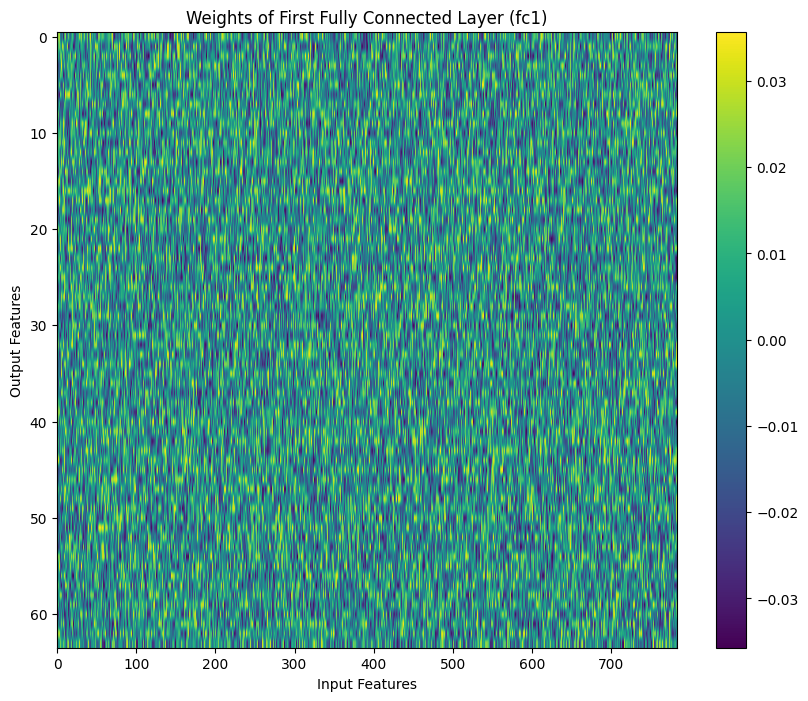

C:\Users\SQREAM\AppData\Local\Temp\ipykernel_17372\1375591129.py:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(activations_fc1, use_line_collection=True)


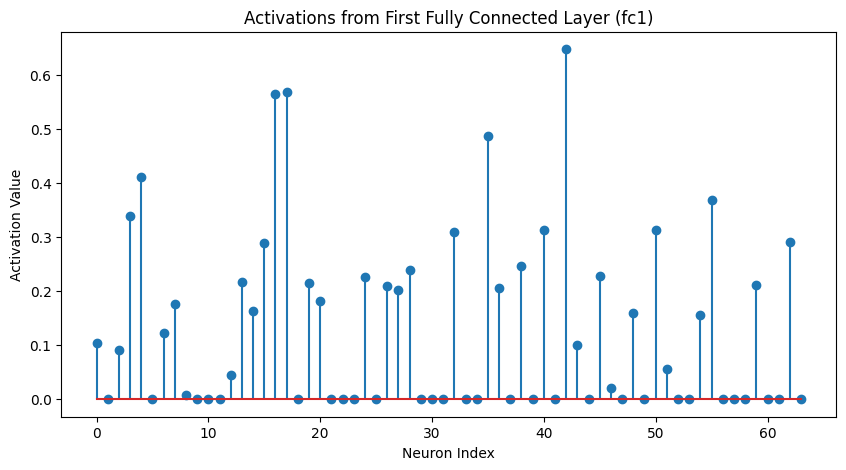

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create a model instance and a synthetic input tensor
model = NN(input_size=784, num_classes=10)
input_tensor = torch.rand((1, 28, 28))  # Random tensor simulating an image

# Forward pass to get activations
activations = model(input_tensor)

# Visualizing the weights of the first fully connected layer
weights = model.fc1.weight.data.numpy()
plt.figure(figsize=(10, 8))
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Weights of First Fully Connected Layer (fc1)')
plt.xlabel('Input Features')
plt.ylabel('Output Features')
plt.show()

# Optionally, visualize the activations from fc1
activations_fc1 = F.relu(model.fc1(model.flatten(input_tensor)))
activations_fc1 = activations_fc1.data.numpy().reshape(-1)
plt.figure(figsize=(10, 5))
plt.stem(activations_fc1, use_line_collection=True)
plt.title('Activations from First Fully Connected Layer (fc1)')
plt.xlabel('Neuron Index')
plt.ylabel('Activation Value')
plt.show()
